In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib widget

## Load data

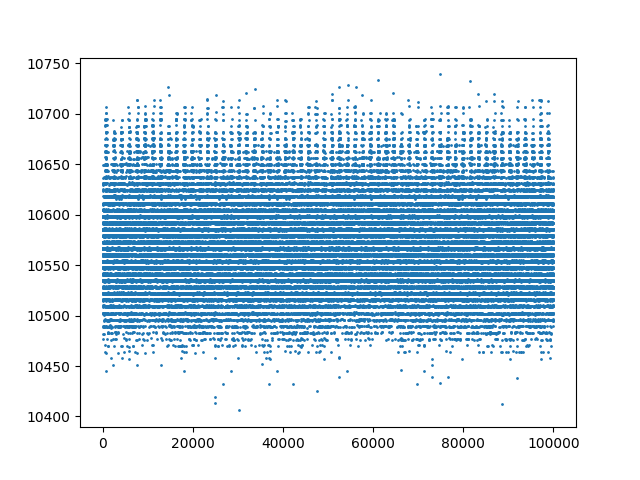

In [6]:
'''
Load comparison 2 switches
'''
lat = np.load('processed-data/2switches/lat_2249_100724.npy')[:-2]
lat10 = np.load('processed-data/2switches/lat_load10_2254_100724.npy')
lat20 = np.load('processed-data/2switches/lat_load20_2256_100724.npy')
lat30 = np.load('processed-data/2switches/lat_load30_2256_100724.npy')
lat40 = np.load('processed-data/2switches/lat_load40_2258_100724.npy')
lat50 = np.load('processed-data/2switches/lat_load50_2259_100724.npy')
lat60 = np.load('processed-data/2switches/lat_load60_2259_100724.npy')
lat70 = np.load('processed-data/2switches/lat_load70_2300_100724.npy')
lat80 = np.load('processed-data/2switches/lat_load80_2301_100724.npy')
lat90 = np.load('processed-data/2switches/lat_load90_2302_100724.npy')
lat90 = lat90[lat90 > 0]

lats2 = [lat, lat10, lat20, lat30, lat40, lat50, lat60, lat70, lat80, lat90]

y = lat
x = np.arange(len(y))
fig,ax = plt.subplots(1,1)
ax.scatter(x,y,s=1)

In [27]:
(np.max(rdma_lats4) - np.min(rdma_lats4)) / 300

580.2716666666666

In [29]:
(np.max(udp_lats4) - np.min(udp_lats4)) / 300

11119.086666666666

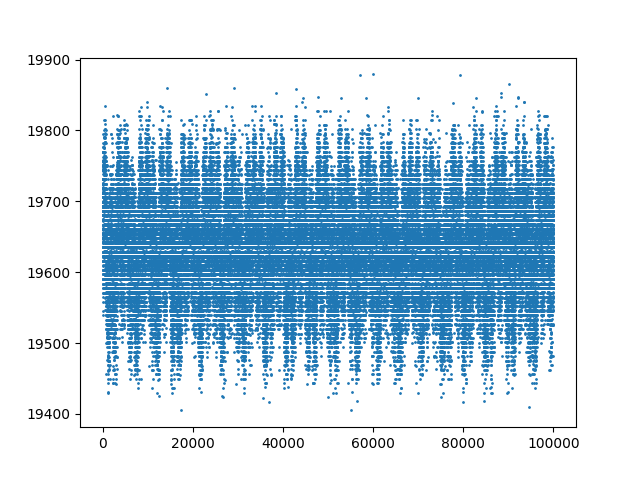

In [7]:
'''
Load comparison 4 switches
'''
lat = np.load('processed-data/4switches/lat_1723_080724.npy')[:-2]
lat10 = np.load('processed-data/4switches/lat_load10_1718_080724.npy')
lat20 = np.load('processed-data/4switches/lat_load20_1725_080724.npy')
lat30 = np.load('processed-data/4switches/lat_load30_1727_080724.npy')
lat40 = np.load('processed-data/4switches/lat_load40_1729_080724.npy')
lat50 = np.load('processed-data/4switches/lat_load50_1730_080724.npy')
lat60 = np.load('processed-data/4switches/lat_load60_1734_080724.npy')
lat70 = np.load('processed-data/4switches/lat_load70_1736_080724.npy')
lat80 = np.load('processed-data/4switches/lat_load80_1750_080724.npy')
lat90 = np.load('processed-data/4switches/lat_load90_1716_080724.npy')
# negative latency values in lat90 due to packet loss or similar. Filter out for now
lat90 = lat90[lat90 > 0]

lats4 = [lat, lat10, lat20, lat30, lat40, lat50, lat60, lat70, lat80, lat90]


y = lat
x = np.arange(len(y))
fig,ax = plt.subplots(1,1)
ax.scatter(x,y,s=1)

## Line plot latency vs net load for single switch setup
with error whiskers corresponding to percentiles

In [8]:
y_mean = np.array([])
y_low = np.array([])
low_percentile = 5
high_percentile = 95
y_high = []
for l in lats:
    y_mean = np.append(y_mean,np.mean(l))
    y_low = np.append(y_low, np.percentile(l, low_percentile))
    y_high = np.append(y_high,np.percentile(l, high_percentile))
    
print(f'mean: {y_mean}')
print(f'{low_percentile} percentile: {y_low}')
print(f'{high_percentile} percentile: {y_high}')

NameError: name 'lats' is not defined

ValueError: 'x' and 'y' must have the same size

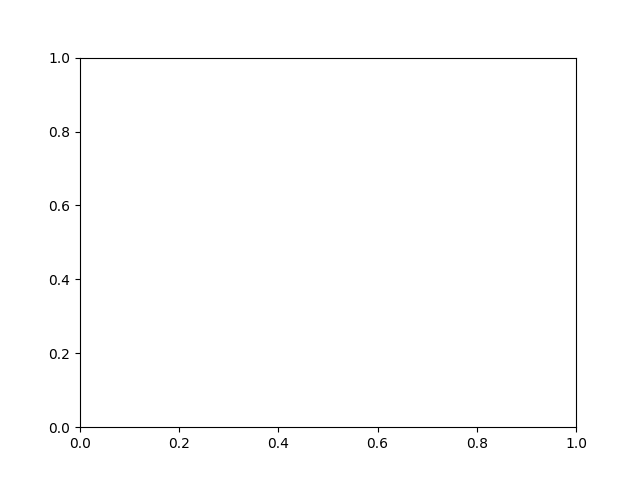

In [9]:
x = np.arange(0,100,10)
y_err = np.concatenate((y_mean - y_low,y_high - y_mean)).reshape((2,len(y_low))) / 1000
fig,ax = plt.subplots(1,1)
ax.errorbar(x,y_mean / 1000,yerr=y_err,ecolor='black',elinewidth=0.4,capsize=2,marker='o')

ax.set_title('4-switch latency')
ax.set_xlabel('Network load %')
ax.set_ylabel('Latency (us)')

## Multiple switch setups plot

In [10]:
'''
Load UDP data
'''
data = np.fromfile('udp-data/udp_2switch.dat', sep=" ", dtype=int)
ts = np.reshape(data, (len(data) // 5, 5))
udp_lats2 = ((ts[:,4] - ts[:,1]) - (ts[:,3] - ts[:,2]))/2

data = np.fromfile('udp-data/udp_4switch.dat', sep=" ", dtype=int)
ts = np.reshape(data, (len(data) // 5, 5))
udp_lats4 = ((ts[:,4] - ts[:,1]) - (ts[:,3] - ts[:,2]))/2

In [11]:
plt.plot(udp_lats2)

In [12]:
'''
Load XDP data
'''
data = np.fromfile('xdp-data/pingpong_xsk_2switch.dat', sep=" ", dtype=int)
ts = np.reshape(data, (len(data) // 5, 5))
xdp_lats2 = ((ts[:,4] - ts[:,1]) - (ts[:,3] - ts[:,2]))/2

data = np.fromfile('xdp-data/pingpong_xsk_4switch.dat', sep=" ", dtype=int)
ts = np.reshape(data, (len(data) // 5, 5))
xdp_lats4 = ((ts[:,4] - ts[:,1]) - (ts[:,3] - ts[:,2]))/2


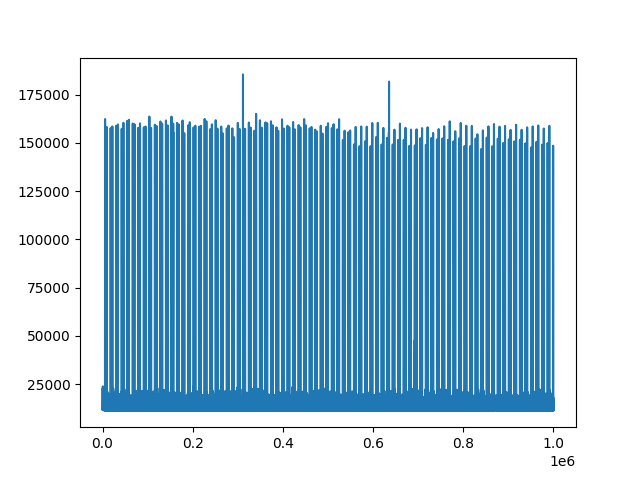

In [13]:
'''
Load RDMA data
'''
data = np.fromfile('rdma-data/rdma_2switch.dat', sep=" ", dtype=int)
ts = np.reshape(data, (len(data) // 5, 5))
rdma_lats2 = ((ts[:,4] - ts[:,1]) - (ts[:,3] - ts[:,2]))/2

data = np.fromfile('rdma-data/rdma_4switch.dat', sep=" ", dtype=int)
ts = np.reshape(data, (len(data) // 5, 5))
rdma_lats4 = ((ts[:,4] - ts[:,1]) - (ts[:,3] - ts[:,2]))/2


fig, ax =  plt.subplots()

ax.plot(rdma_lats4)

# np.median(rdma_lats2)


In [14]:
data2 = [udp_lats2, xdp_lats2, rdma_lats2, lats2[0]]
data3 = [np.array(udp_lats2) + 12000, np.array(xdp_lats2) + 2630, np.array(rdma_lats2) + 2880, np.array(lats2[0]) + 3905]
data4 = [udp_lats4, xdp_lats4, rdma_lats4, lats4[0]]
methods = np.array(["udp", "xdp", "rdma", "ncons"])
nswitches_col = []
data_col = []
method_col = []

data = [data2, data3, data4]
for nswitch in range(len(data)):
    for i in range(len(data[nswitch])):
        for lat in data[nswitch][i]:
            data_col.append(lat)
            method_col.append(methods[i])
            nswitches_col.append(nswitch + 2)
df = pd.DataFrame({"Latency": data_col, "Method": method_col, "Number of swithches": nswitches_col})


Text(0, 0.5, 'Latency (ns)')

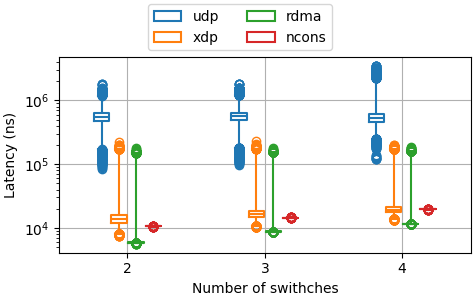

In [15]:
plt.close()
fig, ax = plt.subplots(layout = 'constrained', figsize=(4.75,3))
ax = sns.boxplot(x="Number of swithches", y="Latency", hue="Method", data=df, log_scale=True,  whis=(0.01, 99.99), fill=False, width=.5, gap=.1)

ax.legend(bbox_to_anchor=(0.2, 1), ncols=2)
ax.grid()
ax.set_ylabel("Latency (ns)")

In [16]:
fig.savefig("multi_switch_lat.pdf")

In [17]:
np.mean(udp_lats4) - np.mean(udp_lats2)

-24011.644072423107

In [18]:
np.mean(rdma_lats4) - np.mean(rdma_lats2)

5773.6663735

In [30]:
np.mean(xdp_lats2) - 2900

11376.3024225

In [21]:
np.mean(lats4[0]) - np.mean(lats2[0])

9064.589881797634